In [15]:
import pandas as pd
import numpy as np
import logging
import re
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.linear_model import  LogisticRegression
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
from cleaning import process_text

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)



In [16]:
# Extracting Features for all models
def extract_features(field,training_data,testing_data,type):
    """
    Extract features using different methods
    Args: 
        field (string): statement column    
        training_data (pandas.core.frame.DataFrame): training data
        testing_data (pandas.core.frame.DataFrame): test data
        type (string): feature type
    Returns:
        train & test features and feature transformer
    """
    logging.info("Extracting features and creating vocabulary...")
    if "counts" in type:
        
        # COUNT BASED FEATURE REPRESENTATION
        cv= CountVectorizer(binary=False, max_df=0.95, analyzer=process_text)
        cv.fit_transform(training_data.values)
        train_feature_set=cv.transform(training_data.values)
        test_feature_set=cv.transform(testing_data.values)
        
        return train_feature_set,test_feature_set,cv

In [20]:
# Training model for all methods
def train_model_LogR_clf(classifier, train_val, field,feature_rep,name):
    """
    Training the classifier for the provided features.
    Args: 
        classifier (sklearn.linear_model): statement column  
        train_val (pandas.core.frame.DataFrame): training data
        field (string): test data
        feature_rep (string): feature type
    Returns:
        model, feature transformer and f1-score
    """
    logging.info("Starting model training...")   
    # GET A TRAIN TEST SPLIT (set seed for consistent results)
    training_data, testing_data = train_test_split(train_val,random_state = 2000,)
    # features
    X_train=training_data['statement']
    X_test=testing_data['statement']
    # GET LABELS
    Y_train=training_data['label'].values
    Y_test=testing_data['label'].values
    # GET FEATURES
    train_features,test_features,feature_transformer=extract_features(field,X_train,X_test,type=feature_rep)
    logging.info("Training a Classification Model...")
    model=classifier.fit(train_features,Y_train)
    # GET PREDICTIONS
    predictions = model.predict(test_features)
    # GET EVALUATION NUMBERS ON TEST SET -- HOW DID WE DO?

    logging.info("Starting evaluation...")
    accuracy_LogR_clf = accuracy_score(Y_test,predictions)
    print("The acurracy score of method ",name,"with Count BASED FEATURE REPRESENTATION is:",accuracy_LogR_clf)
    score_LogR_clf = f1_score(Y_test,predictions)
    print("The F1 score of method ",name,"with Count BASED FEATURE REPRESENTATION is:",score_LogR_clf )
    print(classification_report(Y_test,predictions))
    print("Confusion Matrix of",name,"with Count BASED FEATURE REPRESENTATION is:")
    print(confusion_matrix(Y_test,predictions))
    logging.info("Done training and evaluation.")
    
    return model,feature_transformer,score_LogR_clf,accuracy_LogR_clf


In [21]:
# Training model for all methods
def train_model_XGBoost_clf(classifier, train_val, field,feature_rep,name):
    """
    Training the classifier for the provided features.
    Args: 
        classifier (sklearn.linear_model): statement column  
        train_val (pandas.core.frame.DataFrame): training data
        field (string): test data
        feature_rep (string): feature type
    Returns:
        model, feature transformer and f1-score
    """
    logging.info("Starting model training...")   
    # GET A TRAIN TEST SPLIT (set seed for consistent results)
    training_data, testing_data = train_test_split(train_val,random_state = 2000,)
    # features
    X_train=training_data['statement']
    X_test=testing_data['statement']
    # GET LABELS
    Y_train=training_data['label'].values
    Y_test=testing_data['label'].values
    # GET FEATURES
    train_features,test_features,feature_transformer=extract_features(field,X_train,X_test,type=feature_rep)
    logging.info("Training a Classification Model...")
    model=classifier.fit(train_features,Y_train)
    # GET PREDICTIONS
    predictions = model.predict(test_features)
    # GET EVALUATION NUMBERS ON TEST SET -- HOW DID WE DO?
    logging.info("Starting evaluation...")
    accuracy_XGBoost_clf = accuracy_score(Y_test,predictions)
    print("The acurracy score of method ",name,"with Count BASED FEATURE REPRESENTATION is:",accuracy_XGBoost_clf)
    score_XGBoost_clf = f1_score(Y_test,predictions)
    print("The F1 score of method ",name,"with Count BASED FEATURE REPRESENTATION is:",score_XGBoost_clf)
    print(classification_report(Y_test,predictions))
    print("Confusion Matrix of",name,"with Count BASED FEATURE REPRESENTATION is:")
    print(confusion_matrix(Y_test,predictions))
    logging.info("Done training and evaluation.")
    
    return model,feature_transformer,score_XGBoost_clf,accuracy_XGBoost_clf


In [22]:
# Training model for all methods
def train_model_svm(classifier, train_val, field,feature_rep,name):
    """
    Training the classifier for the provided features.
    Args: 
        classifier (sklearn.linear_model): statement column  
        train_val (pandas.core.frame.DataFrame): training data
        field (string): test data
        feature_rep (string): feature type
    Returns:
        model, feature transformer and f1-score
    """
    logging.info("Starting model training...")   
    # GET A TRAIN TEST SPLIT (set seed for consistent results)
    training_data, testing_data = train_test_split(train_val,random_state = 2000,)
    # features
    X_train=training_data['statement']
    X_test=testing_data['statement']
    # GET LABELS
    Y_train=training_data['label'].values
    Y_test=testing_data['label'].values
    # GET FEATURES
    train_features,test_features,feature_transformer=extract_features(field,X_train,X_test,type=feature_rep)
    logging.info("Training a Classification Model...")
    model=classifier.fit(train_features,Y_train)
    # GET PREDICTIONS
    predictions = model.predict(test_features)
    # GET EVALUATION NUMBERS ON TEST SET -- HOW DID WE DO?
    logging.info("Starting evaluation...")
    accuracy_svm = accuracy_score(Y_test,predictions)
    print("The acurracy score of method ",name,"with Count BASED FEATURE REPRESENTATION is:",accuracy_svm)
    score_svm = f1_score(Y_test,predictions)
    print("The F1 score of method ",name,"with Count BASED FEATURE REPRESENTATION is:",score_svm)
    print(classification_report(Y_test,predictions))
    print("Confusion Matrix of",name,"with Count BASED FEATURE REPRESENTATION is:")
    print(confusion_matrix(Y_test,predictions))
    logging.info("Done training and evaluation.")
    
    return model,feature_transformer,score_svm,accuracy_svm


In [24]:
import nltk
nltk.download('stopwords')
  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
 #Merging the training and validation data together to train the model
labelEncoder = LabelEncoder()
frames = [train_news, val_news]
train_val = pd.concat(frames)
train_val['label'].value_counts()
train_val['label'] = labelEncoder.fit_transform(train_val['label'])

     #Logistic Regression training model
field='statement'
LogR_clf = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
lr_model,transform,score_LogR_clf,accuracy_LogR_clf = train_model_LogR_clf(LogR_clf,train_val,field="statement",feature_rep='counts',name='LOGICAL REGRESSION')
     
    
    

[LibLinear]The acurracy score of method  LOGICAL REGRESSION with Count BASED FEATURE REPRESENTATION is: 0.5732638888888889
The F1 score of method  LOGICAL REGRESSION with Count BASED FEATURE REPRESENTATION is: 0.6231217417969948
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1248
           1       0.62      0.62      0.62      1632

    accuracy                           0.57      2880
   macro avg       0.57      0.57      0.57      2880
weighted avg       0.57      0.57      0.57      2880

Confusion Matrix of LOGICAL REGRESSION with Count BASED FEATURE REPRESENTATION is:
[[ 635  613]
 [ 616 1016]]


In [26]:
 #Merging the training and validation data together to train the model
labelEncoder = LabelEncoder()
frames = [train_news, val_news]
train_val = pd.concat(frames)
train_val['label'].value_counts()
train_val['label'] = labelEncoder.fit_transform(train_val['label'])

# XGBoost training model
field='statement'
XGBoost_clf = XGBClassifier(max_depth=15, learning_rate=0.3, n_estimators=150)
XGBoost_model,transform,score_XGBoost_clf,accuracy_XGBoost_clf = train_model_XGBoost_clf(XGBoost_clf,train_val,field="statement",feature_rep='counts',name='XGBoost')


The acurracy score of method  XGBoost with Count BASED FEATURE REPRESENTATION is: 0.5996527777777778
The F1 score of method  XGBoost with Count BASED FEATURE REPRESENTATION is: 0.65551239916343
              precision    recall  f1-score   support

           0       0.54      0.50      0.52      1248
           1       0.64      0.67      0.66      1632

    accuracy                           0.60      2880
   macro avg       0.59      0.59      0.59      2880
weighted avg       0.60      0.60      0.60      2880

Confusion Matrix of XGBoost with Count BASED FEATURE REPRESENTATION is:
[[ 630  618]
 [ 535 1097]]


In [27]:
 #Merging the training and validation data together to train the model
labelEncoder = LabelEncoder()
frames = [train_news, val_news]
train_val = pd.concat(frames)
train_val['label'].value_counts()
train_val['label'] = labelEncoder.fit_transform(train_val['label'])

#SVM training model
field='statement'
svm_clf = svm.SVC(kernel='linear')
svm_model,transform,score_svm,accuracy_svm  = train_model_svm(svm_clf,train_val,field="statement",feature_rep='counts',name='SVM')

The acurracy score of method  SVM with Count BASED FEATURE REPRESENTATION is: 0.5774305555555556
The F1 score of method  SVM with Count BASED FEATURE REPRESENTATION is: 0.6288502592253736
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      1248
           1       0.63      0.63      0.63      1632

    accuracy                           0.58      2880
   macro avg       0.57      0.57      0.57      2880
weighted avg       0.58      0.58      0.58      2880

Confusion Matrix of SVM with Count BASED FEATURE REPRESENTATION is:
[[ 632  616]
 [ 601 1031]]


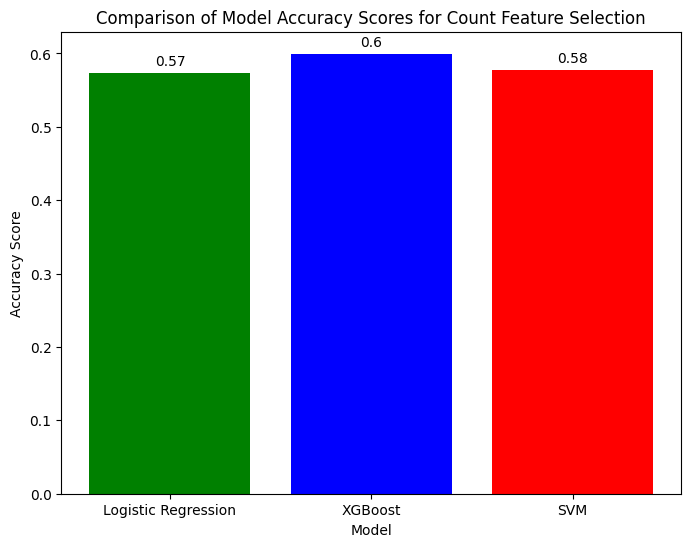

In [30]:
import matplotlib.pyplot as plt

# Example accuracy scores
accuracy_scores = [accuracy_LogR_clf, accuracy_XGBoost_clf, accuracy_svm]

# Model names
model_names = ['Logistic Regression', 'XGBoost', 'SVM']

colors = ['green', 'blue', 'red'] # list of colors for each bar

# Set up the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
# Add the bars to the plot
for i in range(len(model_names)):
    ax.bar(model_names[i], accuracy_scores[i], color=colors[i])

    # Add the accuracy score as text to the bar
    ax.text(model_names[i], accuracy_scores[i] + 0.01, round(accuracy_scores[i], 2), ha='center')

# Add labels and titles
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy Score')
ax.set_title('Comparison of Model Accuracy Scores for Count Feature Selection')

# Display the chart
plt.show()


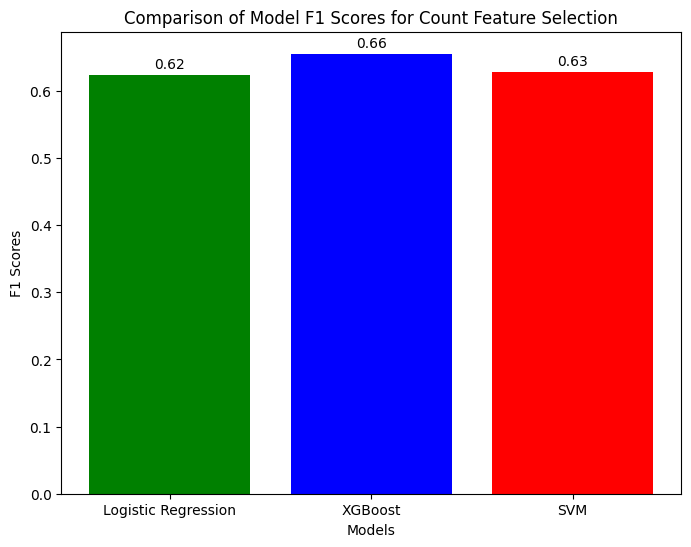

In [31]:
import matplotlib.pyplot as plt

# define model names and their respective F1 scores
model_names = ['Logistic Regression', 'XGBoost', 'SVM']
f1_scores = [score_LogR_clf, score_XGBoost_clf, score_svm]
colors = ['green', 'blue', 'red'] # list of colors for each bar
# Set up the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
# Add the bars to the plot
for i in range(len(model_names)):
    ax.bar(model_names[i], f1_scores[i], color=colors[i])

    # Add the accuracy score as text to the bar
    ax.text(model_names[i], f1_scores[i] + 0.01, round(f1_scores[i], 2), ha='center')


# add labels to the chart
plt.title('Comparison of Model F1 Scores for Count Feature Selection')
plt.xlabel('Models')
plt.ylabel('F1 Scores')

# display the chart
plt.show()
